In [66]:
#Importing the Dependencies
import os
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

#feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [67]:
# Loading data to dataframe
df = pd.read_csv('/home/suhas/Downloads/prosperLoanData.csv')

In [68]:
# explore the data 
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [69]:
df.shape

(113937, 81)

In [70]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [71]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [72]:
#statistics data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [73]:
# Checking for missing values from data
print(df.isnull().sum().sort_values(ascending=False))

GroupKey                         100596
LoanFirstDefaultedCycleNumber     96985
ScorexChangeAtTimeOfListing       95009
ProsperPrincipalOutstanding       91852
ProsperPrincipalBorrowed          91852
                                  ...  
IncomeRange                           0
IncomeVerifiable                      0
StatedMonthlyIncome                   0
LoanKey                               0
Investors                             0
Length: 81, dtype: int64


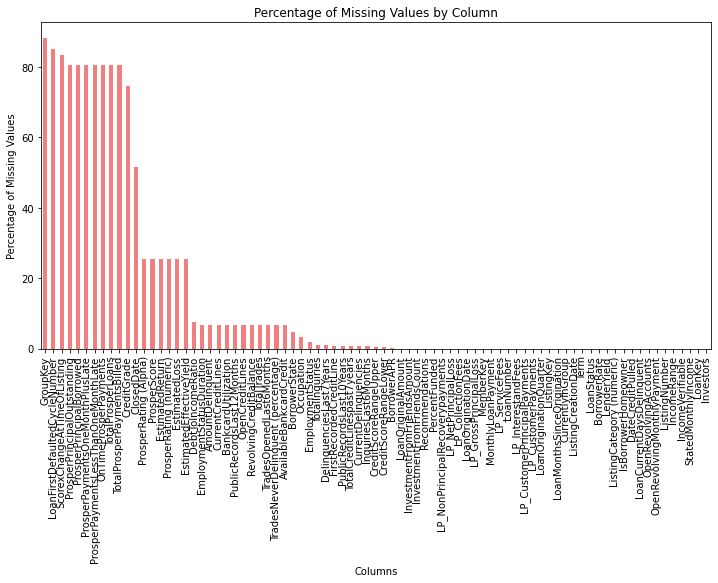

In [74]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.show()

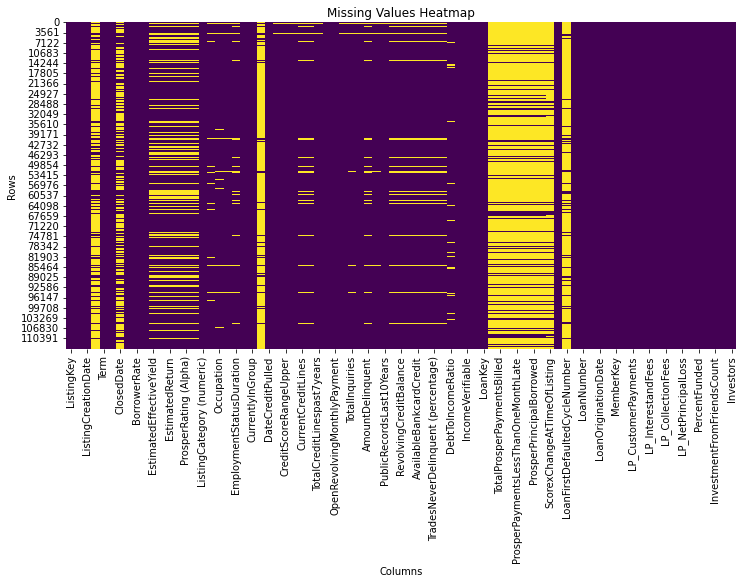

In [75]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
plt.show()

In [76]:
# Duplicates data entry in loan data
df.duplicated().sum()

0

In [77]:
#checking the captalization
df['LoanStatus'].value_counts(dropna=False)

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [95]:
# Handling missing values 
numerical = df.select_dtypes("number")
categorical = df.select_dtypes("object")

In [96]:
categorical

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,NaN,A,CO,Professional,Employed,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,NaN,D,MN,Executive,Employed,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,NaN,Current,NaN,C,IL,Food Service Management,Employed,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,NaN,FinalPaymentInProgress,NaN,A,PA,Professional,Employed,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,NaN,Current,NaN,D,TX,Other,Employed,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,NaN,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [97]:
numerical

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [98]:
categorical.isna().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [99]:
numerical.isna().sum()

ListingNumber                   0
Term                            0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
                               ..
PercentFunded                   0
Recommendations                 0
InvestmentFromFriendsCount      0
InvestmentFromFriendsAmount     0
Investors                       0
Length: 61, dtype: int64

In [100]:
# Create a SimpleImputer for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median', 'most_frequent', etc.

# Fit and transform the imputer on numerical columns
numerical_imputer.fit(numerical)
numerical_filled = pd.DataFrame(numerical_imputer.transform(numerical), columns=numerical.columns)

In [101]:
numerical_filled

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129.0,36.0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,1209647.0,36.0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,81716.0,36.0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,658116.0,36.0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,909464.0,36.0,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087.0,36.0,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,5.000000,...,-75.58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
113933,537216.0,36.0,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,8.000000,...,-30.05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0
113934,1069178.0,60.0,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,3.000000,...,-16.91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,119.0
113935,539056.0,60.0,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,5.000000,...,-235.05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,274.0


In [102]:
# Create a SimpleImputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # You can choose other strategies like 'constant', 'constant', etc.

# Fit and transform the imputer on categorical columns
categorical_imputer.fit(categorical)
categorical_filled = pd.DataFrame(categorical_imputer.transform(categorical), columns=categorical.columns)
categorical_filled

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,C,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,C,Current,2014-03-04 00:00:00,A,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,C,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,C,Current,2014-03-04 00:00:00,A,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,C,Current,2014-03-04 00:00:00,D,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,C,Current,2014-03-04 00:00:00,C,IL,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,C,FinalPaymentInProgress,2014-03-04 00:00:00,A,PA,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,C,Current,2014-03-04 00:00:00,D,TX,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,C,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [103]:
result = pd.concat([numerical_filled, categorical_filled], axis=1)

In [104]:
result

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129.0,36.0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,...,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,1209647.0,36.0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,...,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,81716.0,36.0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,...,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,658116.0,36.0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,...,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,909464.0,36.0,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,...,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087.0,36.0,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,5.000000,...,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,537216.0,36.0,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,8.000000,...,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,1069178.0,60.0,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,3.000000,...,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,539056.0,60.0,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,5.000000,...,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [105]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  float64
 1   Term                                 113937 non-null  float64
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  float64
 11  EmploymentSta

In [106]:
result.isna().sum()

ListingNumber             0
Term                      0
BorrowerAPR               0
BorrowerRate              0
LenderYield               0
                         ..
IncomeRange               0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
Length: 78, dtype: int64

In [108]:
result.isnull().sum()

ListingNumber             0
Term                      0
BorrowerAPR               0
BorrowerRate              0
LenderYield               0
                         ..
IncomeRange               0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
Length: 78, dtype: int64

In [109]:
#Removing outlier for numerical variables

# Calculate z-scores for numerical columns
z_scores = zscore(result.select_dtypes("number"))
# Set a threshold for z-scores (e.g., 3 standard deviations)
outliers_mask = (abs(z_scores) < 3).all(axis=1)

# Remove outliers
df_no_outlie = result[outliers_mask]

In [113]:
#Label Encoding
cols = ['ClosedDate','GroupKey','LoanOriginationDate','ListingKey','ListingCreationDate','CreditGrade','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine','DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
result[cols] = result[cols].apply(LabelEncoder().fit_transform)

In [114]:
result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129.0,36.0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,...,35,7,333,14346,8637,3,100336,425,17,11070
1,1209647.0,36.0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,...,41,0,333,111882,6615,4,69836,1865,7,10301
2,81716.0,36.0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,...,35,2,333,6445,8925,6,46302,259,1,33780
3,658116.0,36.0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,...,50,0,333,64723,2245,3,70775,1534,31,54938
4,909464.0,36.0,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,...,19,0,333,85856,9496,2,71386,1756,23,19464


In [115]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  float64
 1   Term                                 113937 non-null  float64
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  float64
 11  EmploymentSta

In [116]:
result['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [120]:
# converting to binary data
result_one = pd.get_dummies(result["LoanStatus"]).astype(int)
print(result_one)

        Cancelled  Chargedoff  Completed  Current  Defaulted  \
0               0           0          1        0          0   
1               0           0          0        1          0   
2               0           0          1        0          0   
3               0           0          0        1          0   
4               0           0          0        1          0   
...           ...         ...        ...      ...        ...   
113932          0           0          0        1          0   
113933          0           0          0        0          0   
113934          0           0          0        1          0   
113935          0           0          1        0          0   
113936          0           0          0        1          0   

        FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                            0                     0                      0   
1                            0                     0                     

In [121]:
# display result
result_two = pd.concat((result_one, result), axis=1)
result_two = result_two.drop(["LoanStatus"], axis=1)
result_two = result_two.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
data= result_two.rename(columns={"Completed": "LoanStatus"})
print(data)

        LoanStatus  ListingNumber  Term  BorrowerAPR  BorrowerRate  \
0                1       193129.0  36.0      0.16516        0.1580   
1                0      1209647.0  36.0      0.12016        0.0920   
2                1        81716.0  36.0      0.28269        0.2750   
3                0       658116.0  36.0      0.12528        0.0974   
4                0       909464.0  36.0      0.24614        0.2085   
...            ...            ...   ...          ...           ...   
113932           0       753087.0  36.0      0.22354        0.1864   
113933           0       537216.0  36.0      0.13220        0.1110   
113934           0      1069178.0  60.0      0.23984        0.2150   
113935           1       539056.0  60.0      0.28408        0.2605   
113936           0      1140093.0  36.0      0.13189        0.1039   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0            0.1380                 0.168661       0.080306         0.096068   

In [122]:
data

,LoanStatus,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1,193129.0,36.0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,...,35,7,333,14346,8637,3,100336,425,17,11070
1,0,1209647.0,36.0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,...,41,0,333,111882,6615,4,69836,1865,7,10301
2,1,81716.0,36.0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,...,35,2,333,6445,8925,6,46302,259,1,33780
3,0,658116.0,36.0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,...,50,0,333,64723,2245,3,70775,1534,31,54938
4,0,909464.0,36.0,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,...,19,0,333,85856,9496,2,71386,1756,23,19464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0,753087.0,36.0,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,...,23,0,333,72603,7142,4,68807,1650,15,16553
113933,0,537216.0,36.0,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,...,41,0,333,45661,5119,5,43442,1286,30,30365
113934,0,1069178.0,60.0,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,...,35,0,333,100209,8773,3,97553,1819,32,5615
113935,1,539056.0,60.0,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,...,22,1,333,46062,5782,3,38880,1295,30,57908


In [123]:
# Spliting data into training and testing data
X = data.drop(columns='LoanStatus', axis=1)
Y = data['LoanStatus']

In [126]:
X

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129.0,36.0,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,...,35,7,333,14346,8637,3,100336,425,17,11070
1,1209647.0,36.0,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,...,41,0,333,111882,6615,4,69836,1865,7,10301
2,81716.0,36.0,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,...,35,2,333,6445,8925,6,46302,259,1,33780
3,658116.0,36.0,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,...,50,0,333,64723,2245,3,70775,1534,31,54938
4,909464.0,36.0,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,...,19,0,333,85856,9496,2,71386,1756,23,19464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087.0,36.0,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,5.000000,...,23,0,333,72603,7142,4,68807,1650,15,16553
113933,537216.0,36.0,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,8.000000,...,41,0,333,45661,5119,5,43442,1286,30,30365
113934,1069178.0,60.0,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,3.000000,...,35,0,333,100209,8773,3,97553,1819,32,5615
113935,539056.0,60.0,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,5.000000,...,22,1,333,46062,5782,3,38880,1295,30,57908


In [127]:
Y

0         1
1         0
2         1
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    1
113936    0
Name: LoanStatus, Length: 113937, dtype: int64